In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.manifold import TSNE
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_score, davies_bouldin_score, homogeneity_score
from charset_normalizer import from_path

In [2]:
result = from_path("..\\..\\data\\collocations\\processed_collocations_set_from_the_supervisor.csv").best()

df = pd.read_csv("..\\..\\data\\collocations\\processed_collocations_set_from_the_supervisor.csv", encoding=result.encoding)

df

DocumentName  \
0                VoenObozrenN_0001.t   
1                VoenObozrenN_0001.t   
2                VoenObozrenN_0001.t   
3                VoenObozrenN_0001.t   
4                VoenObozrenN_0001.t   
...                              ...   
132876  Voen_Obozren_060524_011094.t   
132877  Voen_Obozren_060524_011094.t   
132878  Voen_Obozren_060524_011094.t   
132879  Voen_Obozren_060524_011094.t   
132880  Voen_Obozren_060524_011094.t   

                             OriginalCollocation  \
0                                  западный блок   
1                            беспилотный аппарат   
2                                     борт судно   
3                               высокий точность   
4       высокий уровень технический оснащенность   
...                                          ...   
132876                          флагманский дрон   
132877                флагманский дрон разведчик   
132878               фортификационный вооружение   
132879                       человеческий ошибка   
132880                                элемент ии   

                           NormalizedCollocation  Frequency  
0                                  западный блок          2  
1                            беспилотный аппарат          1  
2                                     борт судна          1  
3                               высокая точность          1  
4       высокий уровень технической оснащенности          1  
...                                          ...        ...  
132876                          флагманский дрон          1  
132877                флагманский дрон-разведчик          1  
132878               фортификационное вооружение          1  
132879                       человеческая ошибка          1  
132880                                элемент ИИ          1  

[132881 rows x 4 columns]

In [3]:
df['Frequency'] = df['Frequency'].astype(int)

In [4]:
df["FrequencyInText"] = df.groupby(["DocumentName", "NormalizedCollocation"])["NormalizedCollocation"].transform("count")
df["FrequencyInCorpus"] = df.groupby("NormalizedCollocation")["NormalizedCollocation"].transform("count")

df

DocumentName  \
0                VoenObozrenN_0001.t   
1                VoenObozrenN_0001.t   
2                VoenObozrenN_0001.t   
3                VoenObozrenN_0001.t   
4                VoenObozrenN_0001.t   
...                              ...   
132876  Voen_Obozren_060524_011094.t   
132877  Voen_Obozren_060524_011094.t   
132878  Voen_Obozren_060524_011094.t   
132879  Voen_Obozren_060524_011094.t   
132880  Voen_Obozren_060524_011094.t   

                             OriginalCollocation  \
0                                  западный блок   
1                            беспилотный аппарат   
2                                     борт судно   
3                               высокий точность   
4       высокий уровень технический оснащенность   
...                                          ...   
132876                          флагманский дрон   
132877                флагманский дрон разведчик   
132878               фортификационный вооружение   
132879                       человеческий ошибка   
132880                                элемент ии   

                           NormalizedCollocation  Frequency  FrequencyInText  \
0                                  западный блок          2                1   
1                            беспилотный аппарат          1                1   
2                                     борт судна          1                1   
3                               высокая точность          1                1   
4       высокий уровень технической оснащенности          1                1   
...                                          ...        ...              ...   
132876                          флагманский дрон          1                1   
132877                флагманский дрон-разведчик          1                1   
132878               фортификационное вооружение          1                1   
132879                       человеческая ошибка          1                1   
132880                                элемент ИИ          1                1   

        FrequencyInCorpus  
0                       4  
1                      33  
2                       2  
3                      20  
4                       2  
...                   ...  
132876                  1  
132877                  1  
132878                  1  
132879                  1  
132880                  2  

[132881 rows x 6 columns]

In [5]:
df = df[df["FrequencyInCorpus"] > 1]
df

DocumentName  \
0                VoenObozrenN_0001.t   
1                VoenObozrenN_0001.t   
2                VoenObozrenN_0001.t   
3                VoenObozrenN_0001.t   
4                VoenObozrenN_0001.t   
...                              ...   
132869  Voen_Obozren_060524_011094.t   
132870  Voen_Obozren_060524_011094.t   
132872  Voen_Obozren_060524_011094.t   
132873  Voen_Obozren_060524_011094.t   
132880  Voen_Obozren_060524_011094.t   

                             OriginalCollocation  \
0                                  западный блок   
1                            беспилотный аппарат   
2                                     борт судно   
3                               высокий точность   
4       высокий уровень технический оснащенность   
...                                          ...   
132869                              ударный дрон   
132870                           украинский дрон   
132872                             управление со   
132873                           усиление сигнал   
132880                                элемент ии   

                           NormalizedCollocation  Frequency  FrequencyInText  \
0                                  западный блок          2                1   
1                            беспилотный аппарат          1                1   
2                                     борт судна          1                1   
3                               высокая точность          1                1   
4       высокий уровень технической оснащенности          1                1   
...                                          ...        ...              ...   
132869                              ударный дрон          1                1   
132870                           украинский дрон          1                1   
132872                             управление СО          1                1   
132873                          усиление сигнала          1                1   
132880                                элемент ИИ          1                1   

        FrequencyInCorpus  
0                       4  
1                      33  
2                       2  
3                      20  
4                       2  
...                   ...  
132869                 13  
132870                  2  
132872                  4  
132873                  2  
132880                  2  

[80981 rows x 6 columns]

In [6]:
doc_word_matrix = df.pivot_table(
    index='DocumentName',
    columns='NormalizedCollocation',
    values='Frequency',
    aggfunc='sum',
    fill_value=0
)

doc_word_matrix

NormalizedCollocation         "Баба-Яга"  "Венгард"  "Гелиос-РЛД"  \
DocumentName                                                        
VoenObozrenN_0001.t                    0          0             0   
VoenObozrenN_0002.t                    0          1             0   
VoenObozrenN_0003.t                    0          0             0   
VoenObozrenN_0004.t                    0          0             0   
VoenObozrenN_0005.t                    0          0             0   
...                                  ...        ...           ...   
Voen_Obozren_060524_011090.t           0          0             0   
Voen_Obozren_060524_011091.t           0          0             0   
Voen_Obozren_060524_011092.t           0          0             0   
Voen_Obozren_060524_011093.t           0          0             0   
Voen_Obozren_060524_011094.t           0          0             0   

NormalizedCollocation         "Иван Грен"  "Клавесин 1РЭ"  "Князь Пожарский"  \
DocumentName                                                                   
VoenObozrenN_0001.t                     0               0                  0   
VoenObozrenN_0002.t                     0               0                  0   
VoenObozrenN_0003.t                     0               0                  0   
VoenObozrenN_0004.t                     0               0                  0   
VoenObozrenN_0005.t                     0               0                  0   
...                                   ...             ...                ...   
Voen_Obozren_060524_011090.t            0               0                  0   
Voen_Obozren_060524_011091.t            0               0                  0   
Voen_Obozren_060524_011092.t            0               0                  0   
Voen_Obozren_060524_011093.t            0               0                  0   
Voen_Obozren_060524_011094.t            0               0                  0   

NormalizedCollocation         "Комета-М"  "Морской сборник"  "Панцирь-С1Э"  \
DocumentName                                                                 
VoenObozrenN_0001.t                    0                  0              0   
VoenObozrenN_0002.t                    0                  0              0   
VoenObozrenN_0003.t                    0                  0              0   
VoenObozrenN_0004.t                    0                  0              0   
VoenObozrenN_0005.t                    0                  0              0   
...                                  ...                ...            ...   
Voen_Obozren_060524_011090.t           0                  0              0   
Voen_Obozren_060524_011091.t           0                  0              0   
Voen_Obozren_060524_011092.t           0                  0              0   
Voen_Obozren_060524_011093.t           0                  0              0   
Voen_Obozren_060524_011094.t           0                  0              0   

NormalizedCollocation         "Свирель"  ...  ядерный удар  \
DocumentName                             ...                 
VoenObozrenN_0001.t                   0  ...             0   
VoenObozrenN_0002.t                   0  ...            10   
VoenObozrenN_0003.t                   0  ...             0   
VoenObozrenN_0004.t                   0  ...             0   
VoenObozrenN_0005.t                   0  ...             0   
...                                 ...  ...           ...   
Voen_Obozren_060524_011090.t          0  ...             2   
Voen_Obozren_060524_011091.t          0  ...             0   
Voen_Obozren_060524_011092.t          0  ...             2   
Voen_Obozren_060524_011093.t          0  ...             0   
Voen_Obozren_060524_011094.t          0  ...             0   

NormalizedCollocation         ядерный удар по Москве  ядерный чемоданчик  \
DocumentName                                                               
VoenObozrenN_0001.t                                0                   0   
VoenObozren

In [7]:
transformer = TfidfTransformer()
tfidf_matrix = transformer.fit_transform(doc_word_matrix)
similarity_matrix = cosine_similarity(tfidf_matrix)
similarity_df = pd.DataFrame(similarity_matrix, index=doc_word_matrix.index, columns=doc_word_matrix.index)
similarity_df.to_csv("..\\..\\data\\collocations\\cosine_similarity_matrix.csv", index=True)
similarity_df

DocumentName                  VoenObozrenN_0001.t  VoenObozrenN_0002.t  \
DocumentName                                                             
VoenObozrenN_0001.t                      1.000000             0.000000   
VoenObozrenN_0002.t                      0.000000             1.000000   
VoenObozrenN_0003.t                      0.000000             0.000000   
VoenObozrenN_0004.t                      0.021329             0.014692   
VoenObozrenN_0005.t                      0.004878             0.003312   
...                                           ...                  ...   
Voen_Obozren_060524_011090.t             0.000000             0.092104   
Voen_Obozren_060524_011091.t             0.000000             0.027613   
Voen_Obozren_060524_011092.t             0.000000             0.148570   
Voen_Obozren_060524_011093.t             0.001578             0.059150   
Voen_Obozren_060524_011094.t             0.000000             0.004341   

DocumentName                  VoenObozrenN_0003.t  VoenObozrenN_0004.t  \
DocumentName                                                             
VoenObozrenN_0001.t                      0.000000             0.021329   
VoenObozrenN_0002.t                      0.000000             0.014692   
VoenObozrenN_0003.t                      1.000000             0.000000   
VoenObozrenN_0004.t                      0.000000             1.000000   
VoenObozrenN_0005.t                      0.000000             0.067238   
...                                           ...                  ...   
Voen_Obozren_060524_011090.t             0.006708             0.006366   
Voen_Obozren_060524_011091.t             0.000000             0.000000   
Voen_Obozren_060524_011092.t             0.000000             0.006934   
Voen_Obozren_060524_011093.t             0.000000             0.007895   
Voen_Obozren_060524_011094.t             0.049783             0.004516   

DocumentName                  VoenObozrenN_0005.t  VoenObozrenN_0006.t  \
DocumentName                                                             
VoenObozrenN_0001.t                      0.004878             0.000000   
VoenObozrenN_0002.t                      0.003312             0.000000   
VoenObozrenN_0003.t                      0.000000             0.005400   
VoenObozrenN_0004.t                      0.067238             0.001367   
VoenObozrenN_0005.t                      1.000000             0.000000   
...                                           ...                  ...   
Voen_Obozren_060524_011090.t             0.000000             0.000000   
Voen_Obozren_060524_011091.t             0.000000             0.000000   
Voen_Obozren_060524_011092.t             0.000000             0.005991   
Voen_Obozren_060524_011093.t             0.003076             0.002023   
Voen_Obozren_060524_011094.t             0.000000             0.001927   

DocumentName                  VoenObozrenN_0007.t  VoenObozrenN_0008.t  \
DocumentName                                                             
VoenObozrenN_0001.t                      0.000000             0.000000   
VoenObozrenN_0002.t                      0.003145             0.021976   
VoenObozrenN_0003.t                      0.000000             0.005277   
VoenObozrenN_0004.t                      0.000000             0.008237   
VoenObozrenN_0005.t                      0.000000             0.000000   
...                                           ...                  ...   
Voen_Obozren_060524_011090.t             0.000000             0.003466   
Voen_Obozren_060524_011091.t             0.000000             0.008253   
Voen_Obozren_060524_011092.t             0.000000             0.006342   
Voen_Obozren_060524_011093.t             0.000000             0.061032   
Voen_Obozren_060524_011094.t             0.000000             0.000000   

DocumentName                  VoenObozrenN_0009.t  VoenObozrenN_0010.t  ...  \
DocumentName                                                         

In [8]:
def save_clusters(labels, method_name):
    cluster_df = pd.DataFrame({"Document": doc_word_matrix.index, "Cluster": labels})
    cluster_df.to_csv(f"..\\..\\data\\collocations\\{method_name}_clusters.csv", index=False)

def save_cluster_centers(tfidf_matrix, labels, method_name):
    unique_clusters = np.unique(labels)
    cluster_centers = []

    for cluster in unique_clusters:
        if cluster == -1:
            continue
        cluster_indices = np.where(labels == cluster)[0]
        cluster_vectors = tfidf_matrix[cluster_indices].toarray()
        center_idx = np.argmin(cdist([cluster_vectors.mean(axis=0)], cluster_vectors)[0])
        central_file = doc_word_matrix.index[cluster_indices[center_idx]]
        cluster_centers.append((cluster, central_file))

    centers_df = pd.DataFrame(cluster_centers, columns=["Cluster", "Central_File"])
    centers_df.to_csv(f"..\\..\\data\\collocations\\{method_name}_cluster_centers.csv", index=False)

In [9]:
k = 150
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_labels = kmeans.fit_predict(tfidf_matrix)
save_clusters(kmeans_labels, "kmeans")
save_cluster_centers(tfidf_matrix, kmeans_labels, "kmeans")

In [10]:
eps = 0.6
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric="cosine")
dbscan_labels = dbscan.fit_predict(tfidf_matrix)
save_clusters(dbscan_labels, "dbscan")
save_cluster_centers(tfidf_matrix, dbscan_labels, "dbscan")

In [11]:
n_clusters_agglo = 100
agglo = AgglomerativeClustering(n_clusters=n_clusters_agglo, metric="cosine", linkage="average")
agglo_labels = agglo.fit_predict(tfidf_matrix.toarray())
save_clusters(agglo_labels, "agglomerative")
save_cluster_centers(tfidf_matrix, agglo_labels, "agglomerative")

In [12]:
def load_clusters(file_name):
    return pd.read_csv(file_name)

In [13]:
kmeans_clusters = load_clusters("..\\..\\data\\collocations\\kmeans_clusters.csv")
dbscan_clusters = load_clusters("..\\..\\data\\collocations\\dbscan_clusters.csv")
agglo_clusters = load_clusters("..\\..\\data\\collocations\\agglomerative_clusters.csv")

kmeans_cluster_centers = load_clusters("..\\..\\data\\collocations\\kmeans_cluster_centers.csv")
dbscan_cluster_centers = load_clusters("..\\..\\data\\collocations\\dbscan_cluster_centers.csv")
agglo_cluster_centers = load_clusters("..\\..\\data\\collocations\\agglomerative_cluster_centers.csv")

In [14]:
def visualize_clusters(labels, tfidf_matrix, method_name):
    tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000, metric='cosine')
    tsne_res = tsne.fit_transform(tfidf_matrix.toarray())

    unique_labels = np.unique(labels)
    cmap = ListedColormap(plt.cm.get_cmap('tab20', len(unique_labels)).colors)

    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(tsne_res[:, 0], tsne_res[:, 1], c=labels, cmap=cmap, s=10, alpha=0.9)
    
    max_label = max(unique_labels)
    tick_labels = list(range(0, max_label + 4, 4))
    plt.colorbar(scatter, label=f'{method_name} Cluster', ticks=tick_labels)
    
    plt.title(f't-SNE визуализация кластеров {method_name}')
    plt.xlabel('t-SNE измерение 1')
    plt.ylabel('t-SNE измерение 2')
    
    plt.grid(True)
    plt.show()

    unique_clusters, counts = np.unique(labels, return_counts=True)
    print(f"{method_name} кластеры:", dict(zip(unique_clusters, counts)))

def generate_word_cloud(cluster_label, cluster_df, method_name):
    cluster_files = cluster_df[cluster_df['Cluster'] == cluster_label]['Document']
    print(f"Файлы в кластере {cluster_label} ({method_name}):")
    for f in cluster_files:
        print(f)

    for doc_name in cluster_files:
        doc_data = df[df['DocumentName'] == doc_name]
        word_freq = dict(zip(doc_data['NormalizedCollocation'], doc_data['Frequency']))
        wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
        plt.figure(figsize=(10, 5))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Облако слов для {doc_name}')
        plt.show()

def evaluate_clustering_quality(tfidf_matrix, labels, method_name):
    unique_labels = np.unique(labels)
    
    if len(unique_labels) > 1:
        silhouette = silhouette_score(tfidf_matrix, labels, metric='cosine')
        davies_bouldin = davies_bouldin_score(tfidf_matrix.toarray(), labels)
        homogeneity = homogeneity_score(true_labels, labels) if 'true_labels' in globals() else None
    else:
        silhouette, davies_bouldin, homogeneity = None, None, None
    
    print(f"Метрики качества для {method_name}:")
    print(f"  - Силуэтный коэффициент: {silhouette}")
    print(f"  - Коэффициент Давиеса-Боулдина: {davies_bouldin}")
    if homogeneity is not None:
        print(f"  - Гомогенность: {homogeneity}")

In [15]:
transformer = TfidfTransformer()
tfidf_matrix = transformer.fit_transform(doc_word_matrix)

C:\Users\Juliana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
C:\Users\Juliana\AppData\Local\Temp\ipykernel_21664\3865796362.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = ListedColormap(plt.cm.get_cmap('tab20', len(unique_labels)).colors)


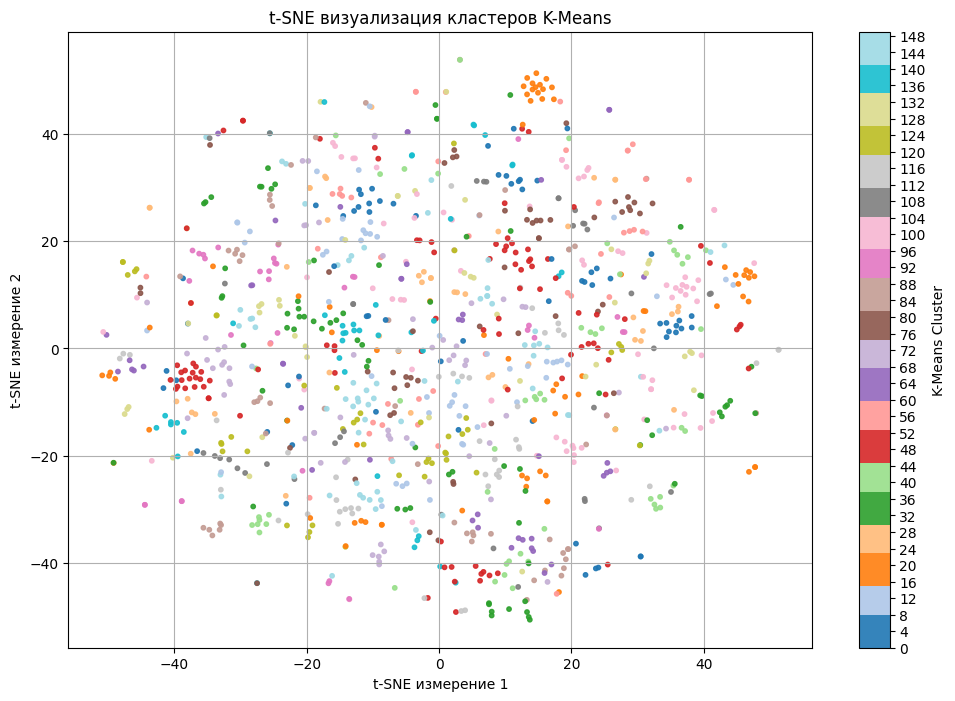

K-Means кластеры: {0: 7, 1: 7, 2: 9, 3: 6, 4: 4, 5: 6, 6: 16, 7: 12, 8: 12, 9: 6, 10: 5, 11: 19, 12: 4, 13: 5, 14: 3, 15: 14, 16: 11, 17: 7, 18: 5, 19: 8, 20: 16, 21: 3, 22: 10, 23: 5, 24: 8, 25: 9, 26: 8, 27: 7, 28: 5, 29: 4, 30: 3, 31: 5, 32: 10, 33: 18, 34: 5, 35: 8, 36: 5, 37: 22, 38: 12, 39: 6, 40: 8, 41: 6, 42: 7, 43: 5, 44: 9, 45: 6, 46: 7, 47: 20, 48: 12, 49: 4, 50: 20, 51: 5, 52: 21, 53: 9, 54: 9, 55: 8, 56: 5, 57: 5, 58: 5, 59: 3, 60: 5, 61: 3, 62: 10, 63: 4, 64: 6, 65: 2, 66: 3, 67: 11, 68: 17, 69: 4, 70: 8, 71: 6, 72: 5, 73: 11, 74: 8, 75: 12, 76: 12, 77: 10, 78: 3, 79: 6, 80: 4, 81: 5, 82: 8, 83: 4, 84: 6, 85: 9, 86: 6, 87: 12, 88: 3, 89: 7, 90: 11, 91: 5, 92: 3, 93: 5, 94: 5, 95: 3, 96: 4, 97: 16, 98: 8, 99: 5, 100: 7, 101: 11, 102: 17, 103: 5, 104: 9, 105: 2, 106: 8, 107: 7, 108: 3, 109: 6, 110: 4, 111: 8, 112: 5, 113: 4, 114: 9, 115: 3, 116: 8, 117: 11, 118: 3, 119: 5, 120: 17, 121: 4, 122: 6, 123: 5, 124: 7, 125: 2, 126: 5, 127: 3, 128: 5, 129: 6, 130: 5, 131: 5, 132: 

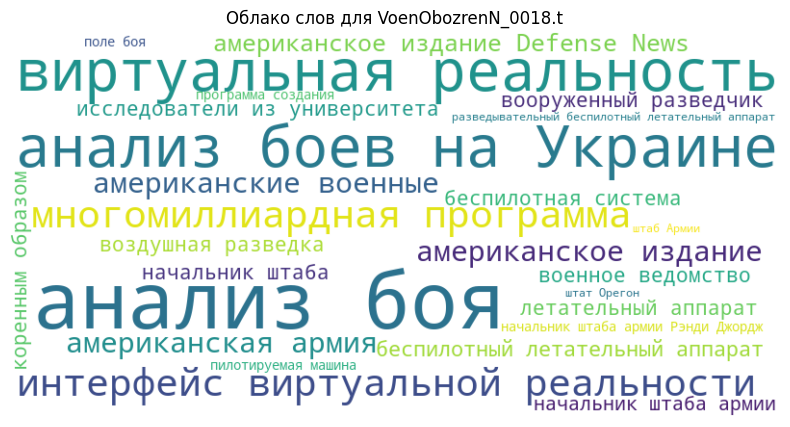

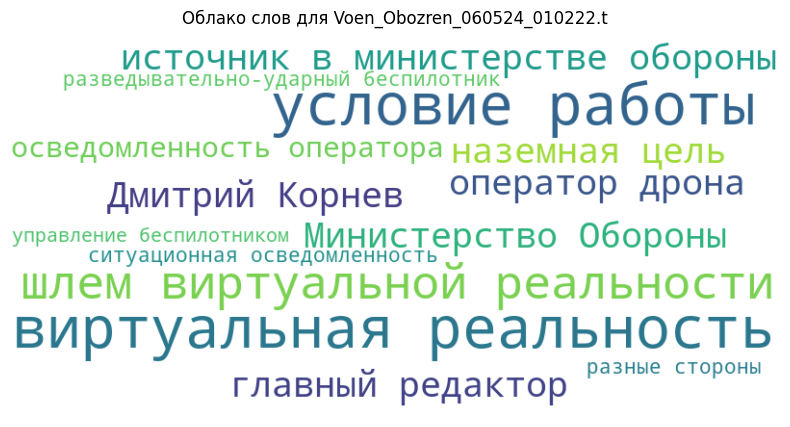

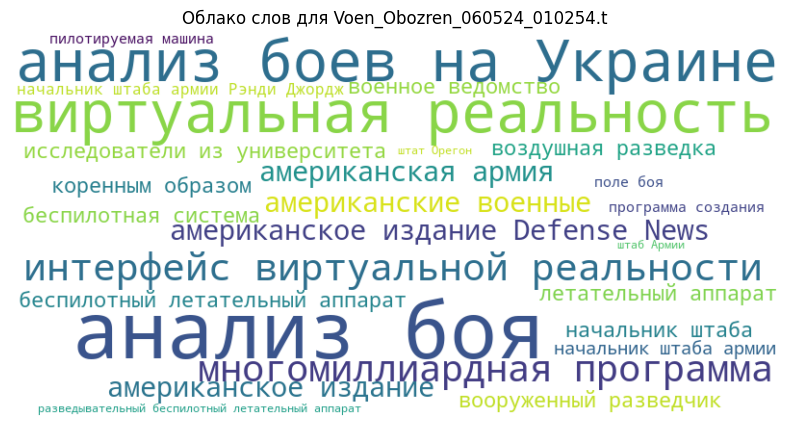

Document  Cluster
0              VoenObozrenN_0001.t       55
1              VoenObozrenN_0002.t       16
2              VoenObozrenN_0003.t      101
3              VoenObozrenN_0004.t      111
4              VoenObozrenN_0005.t      118
...                            ...      ...
1108  Voen_Obozren_060524_011090.t       16
1109  Voen_Obozren_060524_011091.t      117
1110  Voen_Obozren_060524_011092.t      117
1111  Voen_Obozren_060524_011093.t      120
1112  Voen_Obozren_060524_011094.t       76

[1113 rows x 2 columns]

In [16]:
visualize_clusters(kmeans_clusters['Cluster'].values, tfidf_matrix, "K-Means")
generate_word_cloud(21, kmeans_clusters, "K-Means")
kmeans_clusters

In [17]:
kmeans_cluster_centers[:25]

Cluster                  Central_File
0         0           VoenObozrenN_0007.t
1         1  Voen_Obozren_060524_010044.t
2         2  Voen_Obozren_060524_010217.t
3         3  Voen_Obozren_060524_010319.t
4         4  Voen_Obozren_060524_010642.t
5         5  Voen_Obozren_060524_010658.t
6         6  Voen_Obozren_060524_011001.t
7         7  Voen_Obozren_060524_010559.t
8         8  Voen_Obozren_060524_011062.t
9         9  Voen_Obozren_060524_011039.t
10       10  Voen_Obozren_060524_010584.t
11       11  Voen_Obozren_060524_010888.t
12       12  Voen_Obozren_060524_010379.t
13       13  Voen_Obozren_060524_010970.t
14       14  Voen_Obozren_060524_010638.t
15       15  Voen_Obozren_060524_010517.t
16       16           VoenObozrenN_0002.t
17       17  Voen_Obozren_060524_010685.t
18       18  Voen_Obozren_060524_010980.t
19       19           VoenObozrenN_0006.t
20       20  Voen_Obozren_060524_010453.t
21       21           VoenObozrenN_0018.t
22       22  Voen_Obozren_060524_010285.t
23       23           VoenObozrenN_0015.t
24       24  Voen_Obozren_060524_010334.t

In [18]:
evaluate_clustering_quality(tfidf_matrix, kmeans_labels, "K-Means")

Метрики качества для K-Means:
  - Силуэтный коэффициент: 0.048082769507839095
  - Коэффициент Давиеса-Боулдина: 3.3109642468118894


C:\Users\Juliana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
C:\Users\Juliana\AppData\Local\Temp\ipykernel_21664\3865796362.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = ListedColormap(plt.cm.get_cmap('tab20', len(unique_labels)).colors)


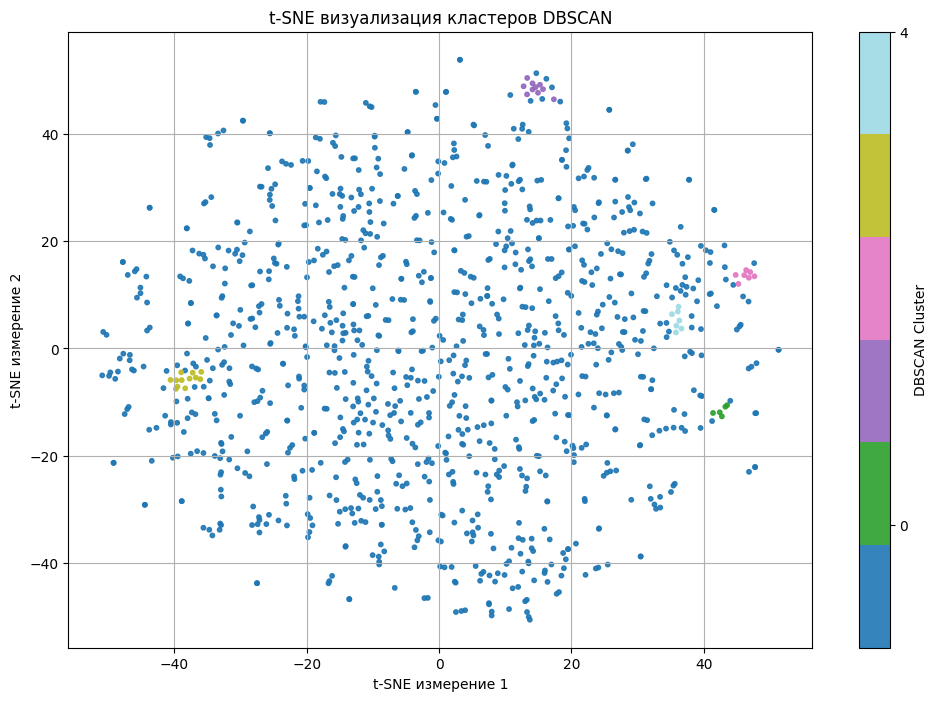

DBSCAN кластеры: {-1: 1072, 0: 5, 1: 10, 2: 7, 3: 12, 4: 7}
Файлы в кластере 8 (DBSCAN):


Document  Cluster
0              VoenObozrenN_0001.t       -1
1              VoenObozrenN_0002.t       -1
2              VoenObozrenN_0003.t       -1
3              VoenObozrenN_0004.t       -1
4              VoenObozrenN_0005.t       -1
...                            ...      ...
1108  Voen_Obozren_060524_011090.t       -1
1109  Voen_Obozren_060524_011091.t       -1
1110  Voen_Obozren_060524_011092.t       -1
1111  Voen_Obozren_060524_011093.t       -1
1112  Voen_Obozren_060524_011094.t       -1

[1113 rows x 2 columns]

In [19]:
visualize_clusters(dbscan_clusters['Cluster'].values, tfidf_matrix, "DBSCAN")
generate_word_cloud(8, dbscan_clusters, "DBSCAN")
dbscan_clusters

In [20]:
dbscan_cluster_centers

Cluster                  Central_File
0        0  Voen_Obozren_060524_010028.t
1        1  Voen_Obozren_060524_010453.t
2        2  Voen_Obozren_060524_010517.t
3        3  Voen_Obozren_060524_010622.t
4        4  Voen_Obozren_060524_010918.t

In [21]:
evaluate_clustering_quality(tfidf_matrix, dbscan_labels, "DBSCAN")

Метрики качества для DBSCAN:
  - Силуэтный коэффициент: -0.0026949302317105443
  - Коэффициент Давиеса-Боулдина: 2.482953284088082


C:\Users\Juliana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
C:\Users\Juliana\AppData\Local\Temp\ipykernel_21664\3865796362.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = ListedColormap(plt.cm.get_cmap('tab20', len(unique_labels)).colors)


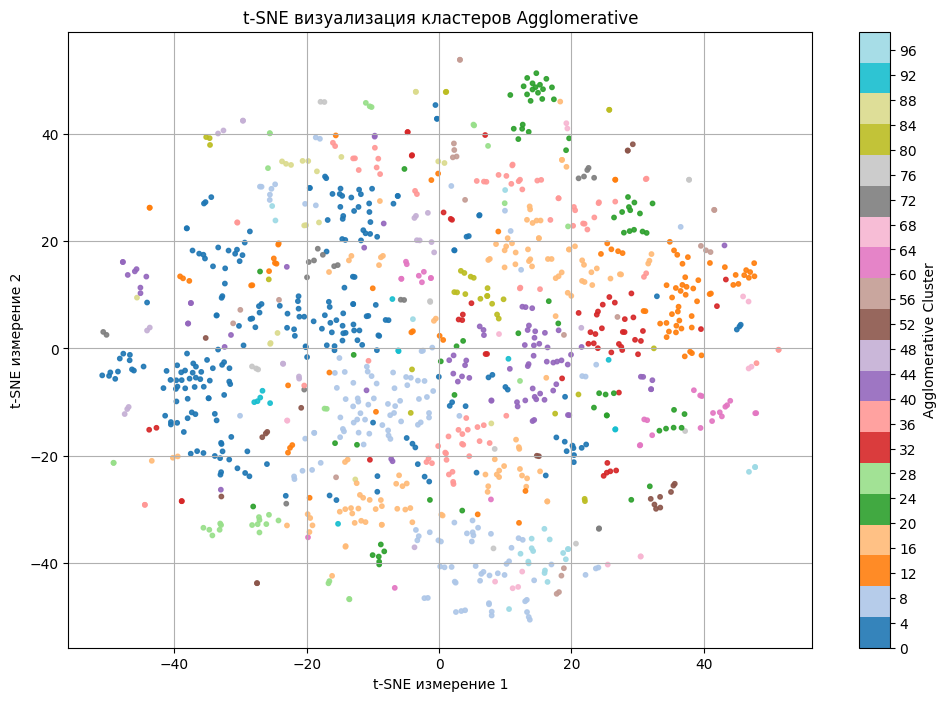

Agglomerative кластеры: {0: 40, 1: 83, 2: 84, 3: 17, 4: 7, 5: 3, 6: 13, 7: 41, 8: 64, 9: 10, 10: 9, 11: 10, 12: 53, 13: 9, 14: 6, 15: 50, 16: 25, 17: 3, 18: 34, 19: 6, 20: 19, 21: 22, 22: 18, 23: 9, 24: 3, 25: 6, 26: 4, 27: 4, 28: 6, 29: 14, 30: 27, 31: 5, 32: 8, 33: 4, 34: 10, 35: 11, 36: 32, 37: 27, 38: 5, 39: 2, 40: 6, 41: 14, 42: 11, 43: 42, 44: 7, 45: 5, 46: 5, 47: 4, 48: 3, 49: 5, 50: 2, 51: 1, 52: 6, 53: 3, 54: 9, 55: 4, 56: 6, 57: 7, 58: 3, 59: 2, 60: 2, 61: 13, 62: 5, 63: 1, 64: 9, 65: 4, 66: 2, 67: 3, 68: 2, 69: 5, 70: 7, 71: 1, 72: 2, 73: 4, 74: 6, 75: 2, 76: 2, 77: 2, 78: 5, 79: 2, 80: 1, 81: 16, 82: 5, 83: 5, 84: 3, 85: 7, 86: 4, 87: 3, 88: 4, 89: 2, 90: 2, 91: 2, 92: 2, 93: 2, 94: 5, 95: 1, 96: 2, 97: 3, 98: 15, 99: 2}
Файлы в кластере 11 (Agglomerative):
Voen_Obozren_060524_010019.t
Voen_Obozren_060524_010277.t
Voen_Obozren_060524_010593.t
Voen_Obozren_060524_010595.t
Voen_Obozren_060524_010605.t
Voen_Obozren_060524_010911.t
Voen_Obozren_060524_010944.t
Voen_Obozren_0605

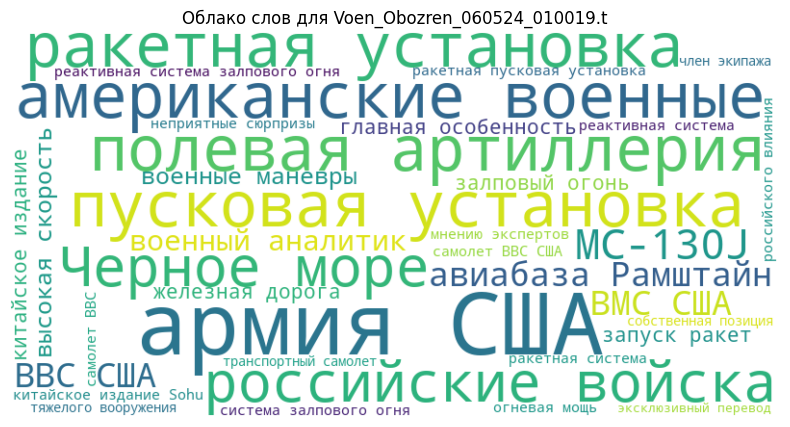

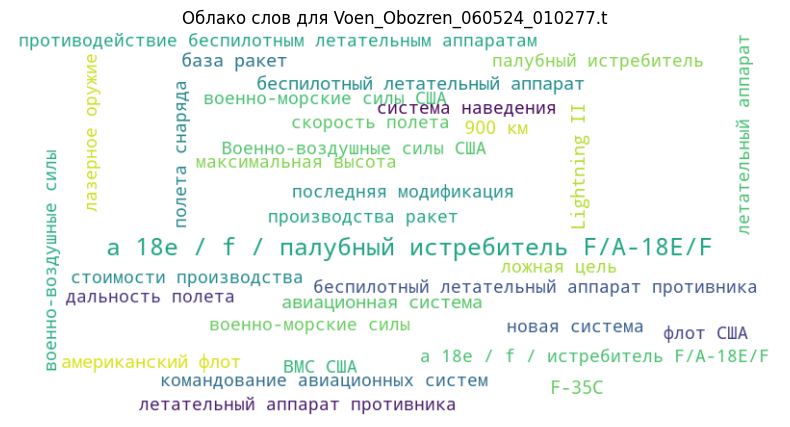

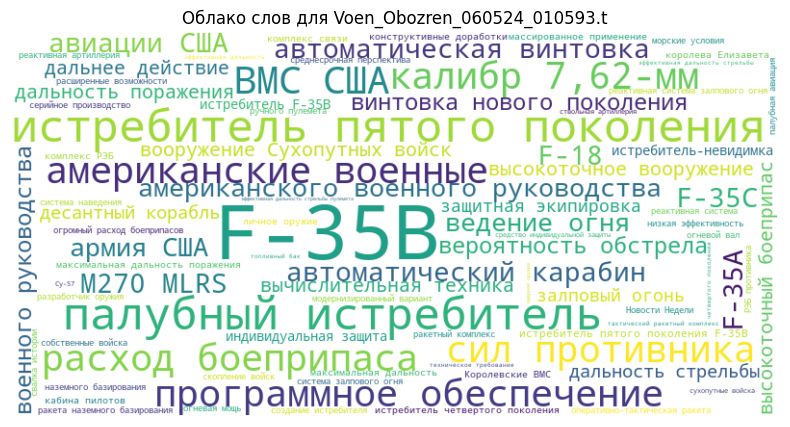

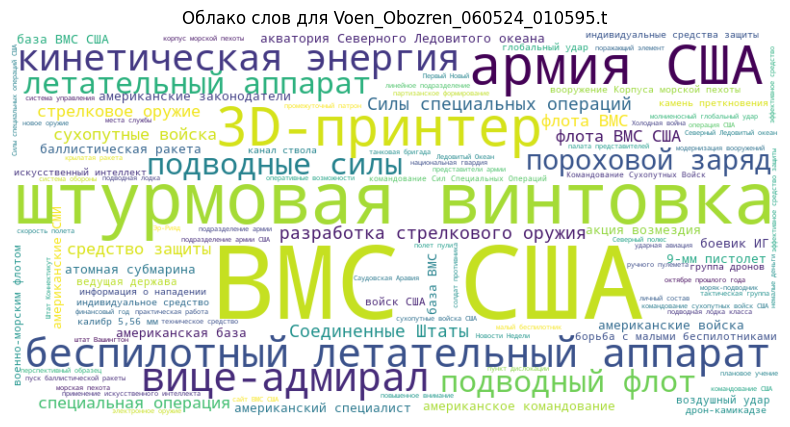

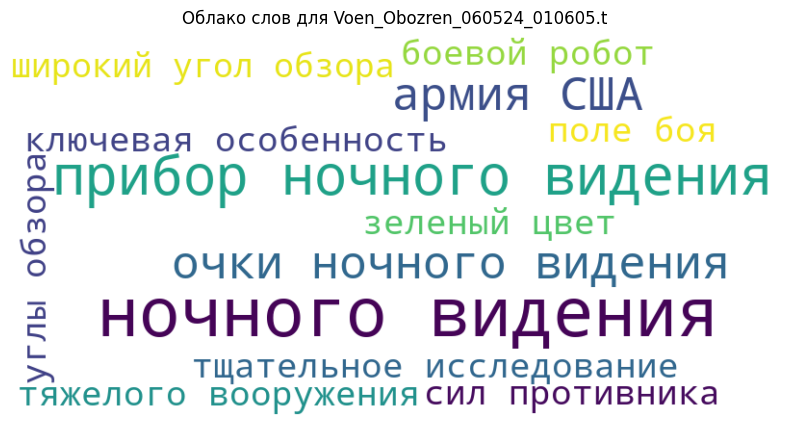

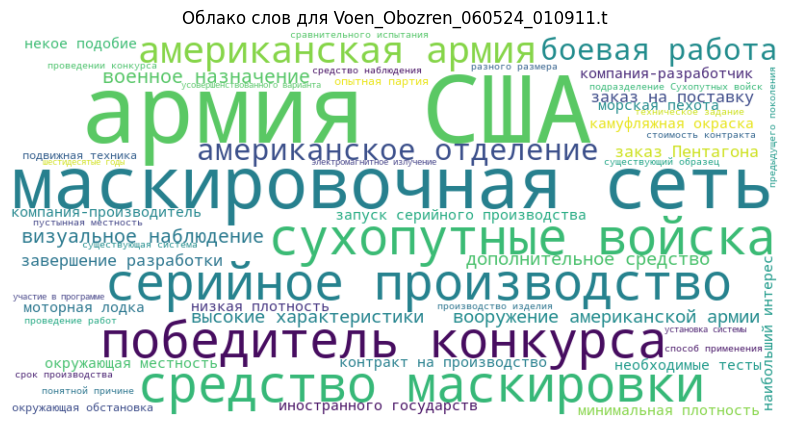

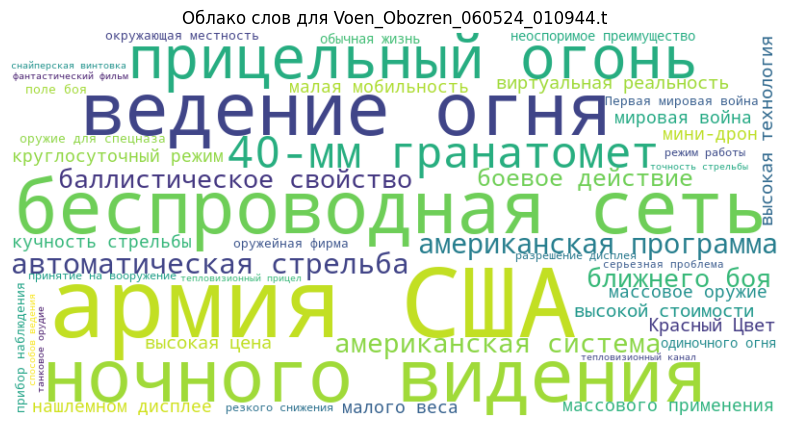

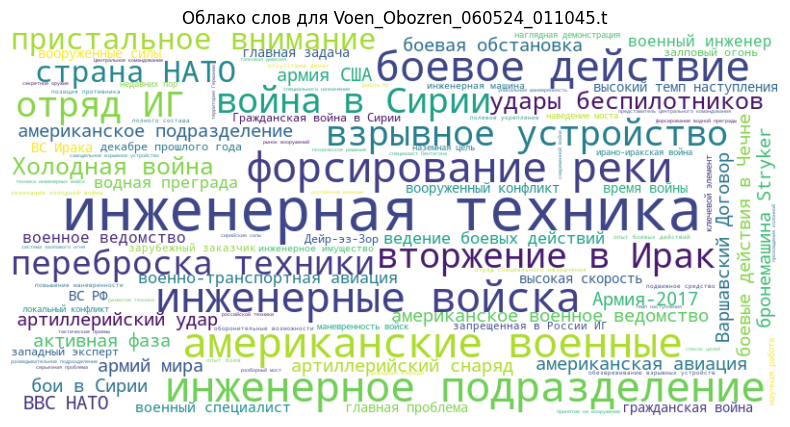

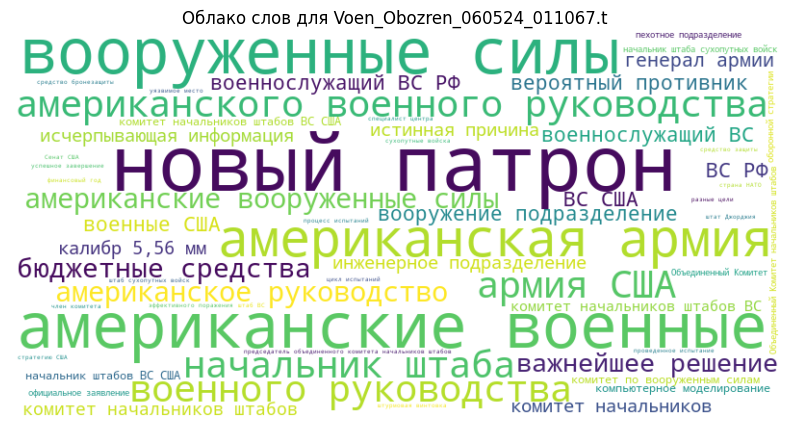

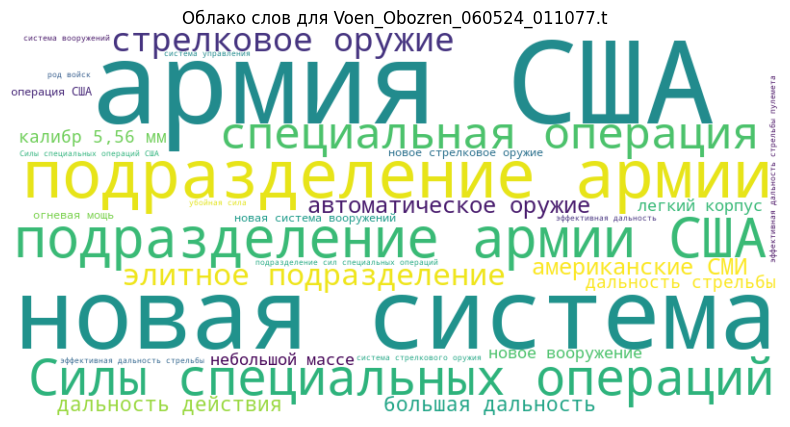

Document  Cluster
0              VoenObozrenN_0001.t       79
1              VoenObozrenN_0002.t       18
2              VoenObozrenN_0003.t       15
3              VoenObozrenN_0004.t       36
4              VoenObozrenN_0005.t       38
...                            ...      ...
1108  Voen_Obozren_060524_011090.t       18
1109  Voen_Obozren_060524_011091.t       91
1110  Voen_Obozren_060524_011092.t       18
1111  Voen_Obozren_060524_011093.t       37
1112  Voen_Obozren_060524_011094.t       15

[1113 rows x 2 columns]

In [22]:
visualize_clusters(agglo_clusters['Cluster'].values, tfidf_matrix, "Agglomerative")
generate_word_cloud(11, agglo_clusters, "Agglomerative")
agglo_clusters

In [23]:
agglo_cluster_centers

Cluster                  Central_File
0         0  Voen_Obozren_060524_010088.t
1         1  Voen_Obozren_060524_010067.t
2         2  Voen_Obozren_060524_010700.t
3         3  Voen_Obozren_060524_010432.t
4         4           VoenObozrenN_0011.t
..      ...                           ...
95       95  Voen_Obozren_060524_010576.t
96       96  Voen_Obozren_060524_010470.t
97       97           VoenObozrenN_0018.t
98       98  Voen_Obozren_060524_010780.t
99       99  Voen_Obozren_060524_010437.t

[100 rows x 2 columns]

In [24]:
evaluate_clustering_quality(tfidf_matrix, agglo_labels, "Agglomerative")

Метрики качества для Agglomerative:
  - Силуэтный коэффициент: 0.04050588143290054
  - Коэффициент Давиеса-Боулдина: 3.369605715603129


In [25]:
output_path = "..\\..\\data\\collocations\\dataprocessed_dataset.csv"
df.to_csv(output_path, index=False, encoding='windows-1251')
print(f"Данные успешно сохранены в {output_path}")

Данные успешно сохранены в ..\..\data\collocations\dataprocessed_dataset.csv


Каждая метрика качества кластеризации оценивает различные аспекты разбиения данных на кластеры:

### **Силуэтный коэффициент (`silhouette_score`)**
   - **Диапазон** от -1 до 1.
   - **Измеряет** насколько хорошо объекты внутри кластера схожи друг с другом и насколько далеки от объектов других кластеров.
   - **Интерпретация**
     - Близкое к **1** значение означает, что кластеры четко разделены.
     - **0** означает, что объекты на границе между кластерами.
     - Отрицательные значения (**< 0**) означают, что кластеры плохо разделены.

### **Коэффициент Давиеса-Боулдина (`davies_bouldin_score`)**
   - **Диапазон** от 0 до ∞ (чем меньше, тем лучше).
   - **Измеряет** среднее отношение внутрикластерной дисперсии к межкластерному расстоянию.
   - **Интерпретация**
     - Чем **меньше** значение, тем лучше кластеры разнесены и плотнее сгруппированы.
     - Высокие значения означают, что кластеры плохо разделены.

### **Гомогенность (`homogeneity_score`)**
   - **Диапазон** от 0 до 1.
   - **Измеряет** Насколько объекты одного класса (истинные метки, если известны) находятся в одном кластере.
   - **Интерпретация**
     - **1** – идеальная гомогенность (каждый кластер содержит объекты только одного класса).
     - **0** – полное перемешивание классов в кластерах.

### Вывод:
- **Силуэтный коэффициент** показывает, насколько отчетливо кластеры разделены.
- **Коэффициент Давиеса-Боулдина** оценивает компактность кластеров и их разнесенность.
- **Гомогенность** показывает, насколько кластеры соответствуют истинной разметке, если она известна.

Если кластеры хорошо разделены и структура данных выражена четко, ожидаются:
- Высокий **силуэтный коэффициент** (~0.5-1),
- Низкий **коэффициент Давиеса-Боулдина** (близко к 0),
- Высокая **гомогенность** (если известны истинные метки).